In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
df = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','Class'])
df

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


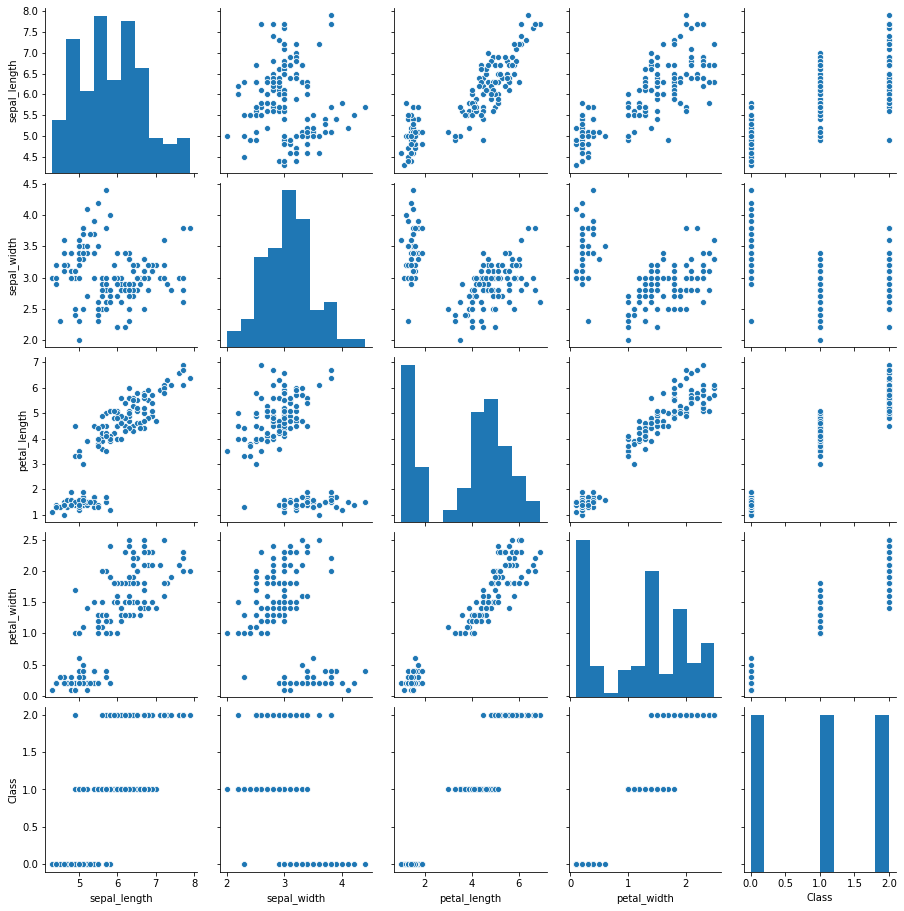

In [24]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
sns.pairplot(df)

In [22]:
X = df.drop('Class', axis = 1)
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 4), (100,), (50, 4), (50,))

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
print("Training Accuracy of KNN: ", knn.score(X_train,y_train))
print("Training Accuracy of LogisticRegression: ",lr.score(X_train,y_train))

Training Accuracy of KNN:  0.96
Training Accuracy of LogisticRegression:  0.97


In [26]:
y_lr = lr.predict(X_test)
y_knn = knn.predict(X_test)
print("Testing Accuracy KNN : ", accuracy_score(y_knn, y_test))
print("Testing Accuracy LogisticRegresssion: ", accuracy_score(y_lr, y_test))

Testing Accuracy KNN :  0.98
Testing Accuracy LogisticRegresssion:  0.94


In [27]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0.5, 1.0, 'Petal Width')

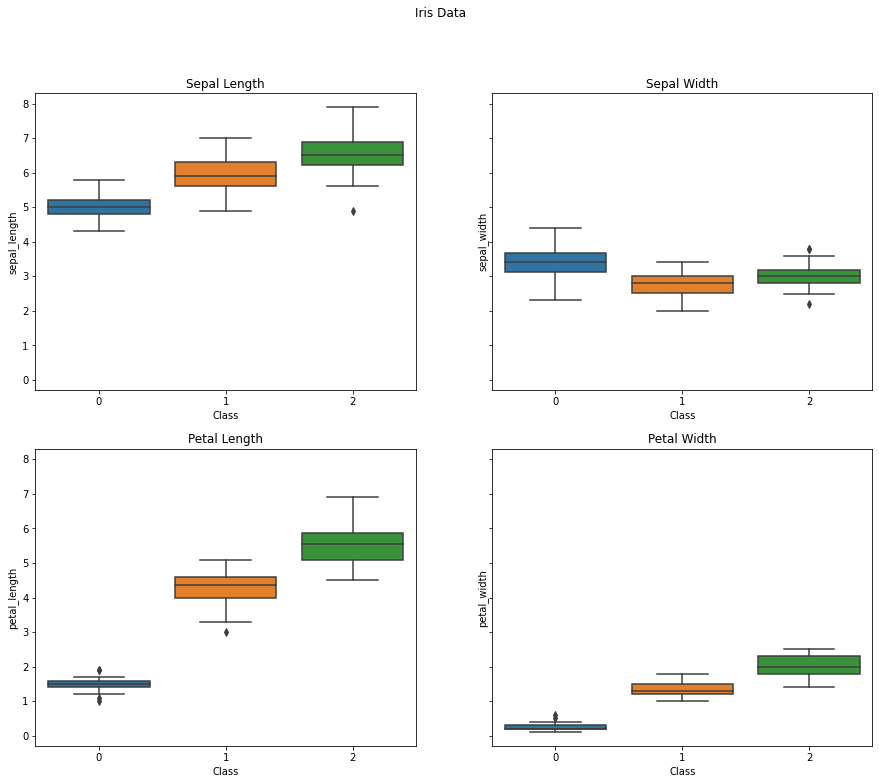

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharey=True)
fig.suptitle('Iris Data')

sns.boxplot(df['Class'], df['sepal_length'], ax=axes[0,0])
axes[0,0].set_title('Sepal Length')

sns.boxplot(df['Class'], df['sepal_width'], ax=axes[0,1])
axes[0,1].set_title('Sepal Width')

sns.boxplot(df['Class'], df['petal_length'], ax=axes[1,0])
axes[1,0].set_title('Petal Length')

sns.boxplot(df['Class'], df['petal_width'], ax=axes[1,1])
axes[1,1].set_title('Petal Width')

###  Tree-based algorithms like Random Forest and Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
print("Training Accuracy of Decision Tree: ", dt.score(X_train,y_train))
print("Training Accuracy of  Random Forest: ",rf.score(X_train,y_train))

Training Accuracy of Decision Tree:  1.0
Training Accuracy of  Random Forest:  1.0


In [46]:
y_dt = dt.predict(X_test)
y_rf = rf.predict(X_test)
print("Testing Accuracy of Decision Tree : ", accuracy_score(y_dt, y_test))
print("Testing Accuracy of Random Forest : ", accuracy_score(y_rf, y_test))

Testing Accuracy of Decision Tree :  0.98
Testing Accuracy of Random Forest :  0.92
